In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
gps_data = pd.read_csv('gps_fixes.csv')

In [7]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26710 entries, 0 to 26709
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_fix_at         26710 non-null  object 
 1   server_upload_at   26710 non-null  object 
 2   longitude          26710 non-null  float64
 3   latitude           26710 non-null  float64
 4   accuracy           26710 non-null  float64
 5   altitude           26710 non-null  float64
 6   bearing            26710 non-null  float64
 7   location_provider  26710 non-null  object 
 8   user_id            26710 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
gps_data.head()

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1


In [9]:
gps_data.isnull().sum()

,0
gps_fix_at,0
server_upload_at,0
longitude,0
latitude,0
accuracy,0
altitude,0
bearing,0
location_provider,0
user_id,0


In [12]:
print("\nUnique values per column:")
for column in gps_data.columns:
    print(f"{column}: {gps_data[column].nunique()}")


Unique values per column:
gps_fix_at: 22057
server_upload_at: 22274
longitude: 26297
latitude: 26069
accuracy: 5065
altitude: 2972
bearing: 796
location_provider: 4
user_id: 372


In [16]:
duplicates = gps_data.duplicated()
print("Total Duplicates:", duplicates.sum())

Total Duplicates: 0


In [17]:
# Basic Feature Engineering
gps_data['upload_delay'] = (gps_data['server_upload_at'] - gps_data['gps_fix_at']).dt.total_seconds()

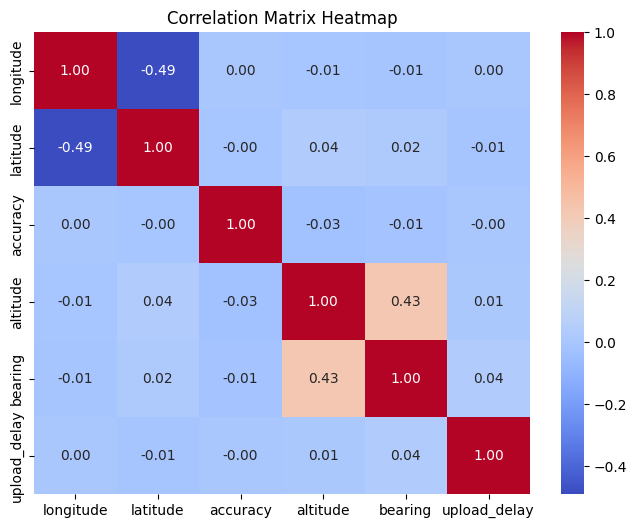

In [18]:
correlation_matrix = gps_data[['longitude', 'latitude', 'accuracy', 'altitude', 'bearing', 'upload_delay']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

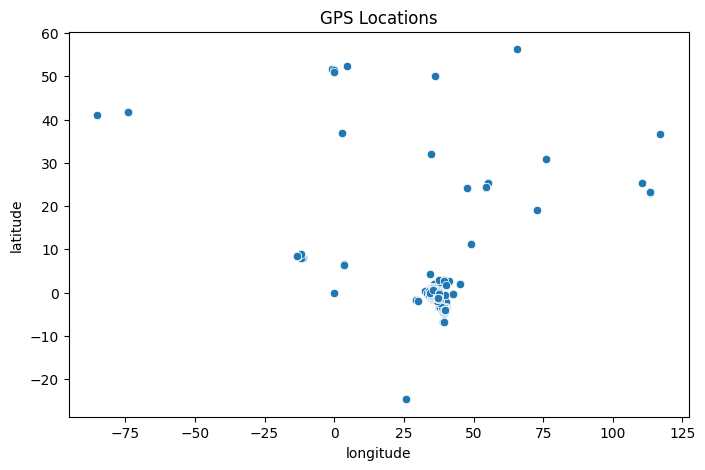

In [34]:
# Scatterplot for GPS locations
plt.figure(figsize=(8,5))
sns.scatterplot(x='longitude', y='latitude', data=gps_data)
plt.title('GPS Locations')
plt.show()

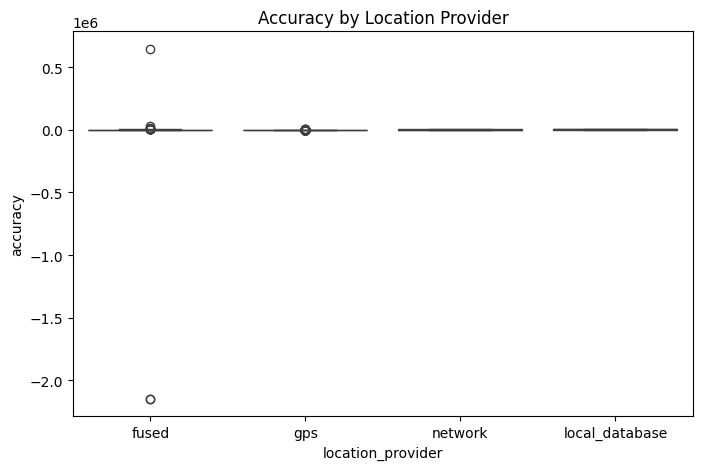

In [32]:
# Boxplot for accuracy by location provider
plt.figure(figsize=(8, 5))
sns.boxplot(x='location_provider', y='accuracy', data=gps_data)
plt.title('Accuracy by Location Provider')
plt.show()

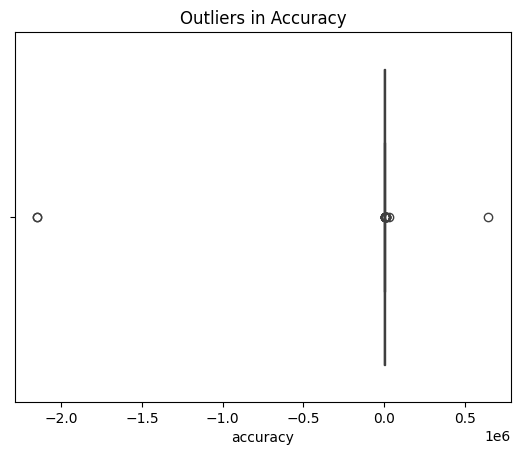

In [25]:
# boxplot for outlier analysis
sns.boxplot(x=gps_data['accuracy'])
plt.title("Outliers in Accuracy")
plt.show()

In [23]:
q1, q3 = np.percentile(gps_data['accuracy'].dropna(), [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = gps_data[(gps_data['accuracy'] < lower_bound) | (gps_data['accuracy'] > upper_bound)]
print(f"\nNumber of outliers in accuracy: {outliers.shape[0]}")


Number of outliers in accuracy: 20


Dropping the outliers: Accuracy reflects GPS signal quality. Extreme values likely indicate poor GPS reception or hardware errors, which are not representative of normal GPS fixes.

In [26]:
gps_data_cleaned = gps_data[(gps_data['accuracy'] >= lower_bound) & (gps_data['accuracy'] <= upper_bound)]
print(f"Shape of data after removing outliers: {gps_data_cleaned.shape}")

Shape of data after removing outliers: (26690, 10)


In [38]:
gps_data_cleaned.head()

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id,upload_delay
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1,382.0
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1,4500.0
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1,1219.0
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1,4.0
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1,1144.0


In [39]:
gps_data_cleaned.to_csv('gps_fixes_new.csv', index=False)